<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Maximum Likelihood Estimation

_Authors: Matt Brems (DC)_ EA Hyde

---

### Learning Objectives
- Learn about "point estimates"
- Overview some methods to find point estimates
- Describe the Likelihood function
- Describe the Maximum Likelihood Estimator (MLE)
- Understand the properties of MLEs

### Lesson Guide
- [Point estimation](#point)
- [Methods of point estimation](#methods)
- [Likelihood](#likelihood)
- [Find the Maximum Likelihood Estimator](#find-mle)
- [Properties of MLEs](#properties)

<a id='point'></a>
## Point estimation
---

An **estimator** is a function of a sample (this can also also called a *statistic*).

Example: estimator of the population mean $\mu$:

### $$ \hat{X} = \frac{\sum_{i=1}^N X_i}{N} $$

An **estimate** is the realized value of an estimator given a particular sample.

Example: an estimate of the population mean is $\mu$ is the realized value $\hat{X} = 6$

**"Point estimation" describes the process by which we develop estimators (statistics) to estimate parameters.**


<a id='methods'></a>
## Methods of point estimation
---

### Sometimes we have intuitive estimators

Sometimes we have really intuitive estimators:
- When the population mean can be estimated by the sample mean.
- When the population standard deviation can be estimated by the sample standard deviation.
- When the population $\beta_0$ for a regression model can be estimated by $\hat{\beta}_0$

### Methods for when estimators are not intuitive

**Method of moments**

> Process: Find sample moments, find population moments, equate them, solve equations.

### $$ \mu_1 = \int_{-\infty}^\infty x f(x) dx \\
\mu_n = \int_{-\infty}^\infty (x - \mu_1)^n f(x) dx$$

**Bayes estimators**

> Process: find the posterior distribution of $\theta$, use $E[\theta|y]$ or something similar

**Maximum likelihood estimation**

**Expectation maximization algorithm (EM)**

> Replaces MLE method with easier maximizations whose limit is the true answer.


<a id='likelihood'></a>
## Likelihood
---

### $$ f(\theta|y) = \frac{f(y|\theta)\;f(\theta)}{f(y)} = \frac{L(\theta|y)\;f(\theta)}{f(y)} \propto L(\theta|y)\;f(\theta) $$

The likelihood $L(\theta|y)$ refers to the likelihood of our parameter $\theta$ given the data $y$.

The function $f(y|\theta)$ is the probability density function associated with random variable $Y$. The parameter $\theta$ defines the pdf $f()$. 

The likelihood $L(\theta|y) = f(y|\theta)$.

**The goal is to identify the value for $\theta$ that will maximize the likelihood.**

<a id='find-mle'></a>
## Find the Maximum Likelihood Estimator $\hat{\theta}$
---

We would like to find the MLE $\hat{\theta}$ of $\theta$:
- **Step 1:** Write out likelihood $L(\theta|y)$.
- **Step 2:** Take derivative with respect to $\theta$.
- **Step 3:** Set equal to zero.
- **Step 4:** Solve for $\theta$.

<a id='properties'></a>
## Properties of MLEs
---

**MLEs are “consistent.”**
- As $n \to \infty$, $\hat{\theta} \to \theta$

**MLEs are “asymptotically normal.”**
- As $n \to \infty$, $\hat{\theta} ~ N(\theta, I(\theta))$ where $I(\theta)$ is the "Fisher information matrix".

**MLEs are “efficient.”**
- No consistent estimator has a lower asymptotic MSE than the MLE.

**If $\hat{\theta}$ is the MLE of $\theta$, then $g(\hat{\theta})$ is the MLE of $g(\theta)$.**

Example: following http://dan.iel.fm/emcee/current/user/line/

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

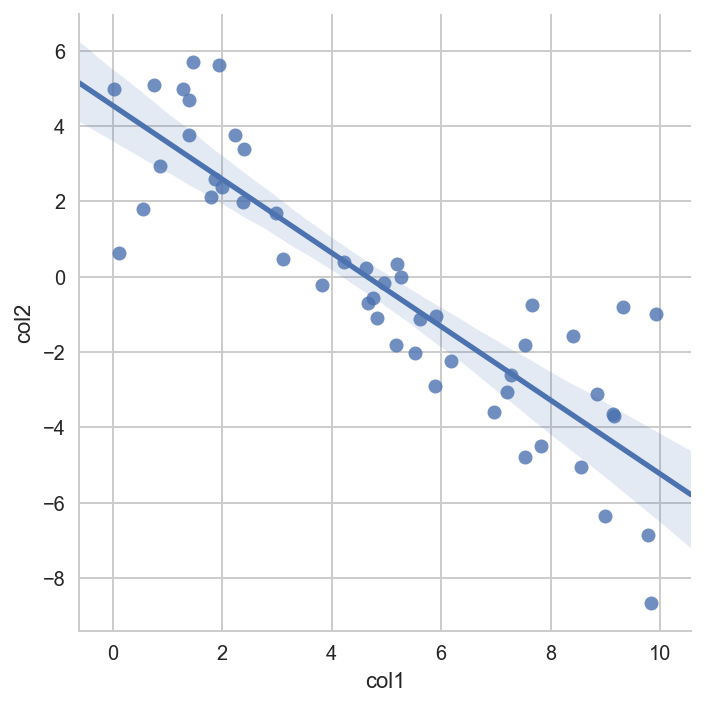

In [37]:
df = pd.DataFrame({'col1': x, 'col2': y})
#df.head()
sns.lmplot("col1", "col2", data=df)

The standard way to fit a line to these data (assuming independent Gaussian error bars) is linear least squares

In [38]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [39]:
print(b_ls,m_ls)

4.39220209776 -0.990736225851


In [40]:
yfit=b_ls+(m_ls*x)

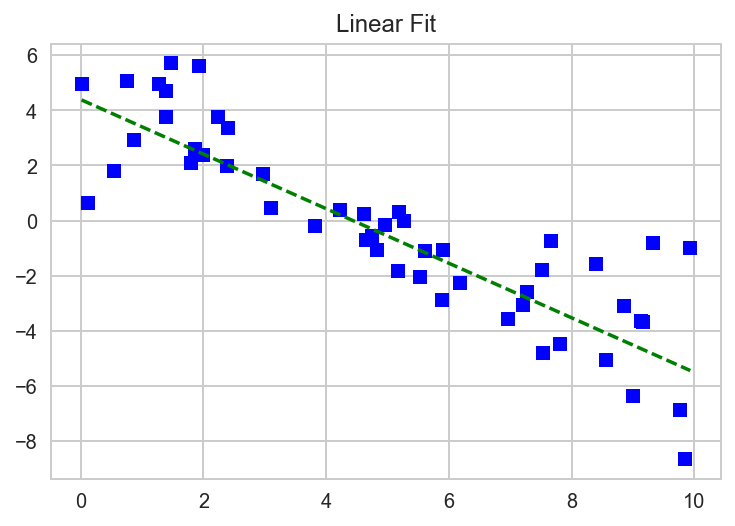

In [44]:
fig, ax = plt.subplots()
ax.plot(x, y,'bs')
ax.plot(x, yfit, 'g--')
ax.set_title('Linear Fit')
plt.show()

The least squares solution found in the previous section is the maximum likelihood result for a model where the error bars are assumed correct, Gaussian and independent. We know, of course, that this isn’t the right model. Unfortunately, there isn’t a generalization of least squares that supports a model like the one that we know to be true. Instead, we need to write down the likelihood function and numerically optimize it. 

## Maximum Likelihood

The likelihood function is simply a Gaussian where the variance is underestimated by some fractional amount: f. In Python, you would code this up as:

In [46]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

The logarithm of f instead of f itself is used for reasons that will become clear in the next section. For now, it should at least be clear that this isn’t a bad idea because it will force f to be always positive. A good way of finding this numerical optimum of this likelihood function is to use the scipy.optimize module:

In [47]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

The optimize module minimizes functions whereas we would like to maximize the likelihood. This goal is equivalent to minimizing the negative likelihood (or in this case, the negative log likelihood). The maximum likelihood result is:

In [48]:
print(result["x"])

[-1.03267031  4.52474316 -0.62524469]


So now let's see the difference

In [49]:
yfitmax=b_ml+(m_ml*x)

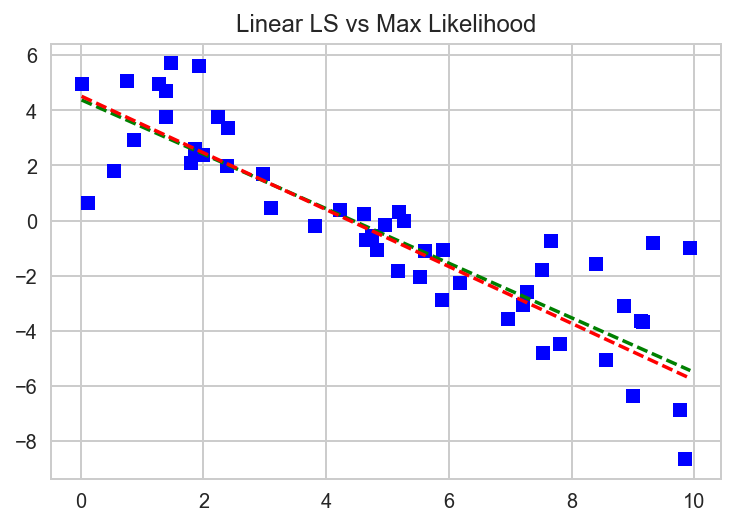

In [50]:
fig, ax = plt.subplots()
ax.plot(x, y,'bs')
ax.plot(x, yfit, 'g--')
ax.plot(x, yfitmax, 'r--')
ax.set_title('Linear LS vs Max Likelihood')
plt.show()

## Marginalization & uncertainty estimation (Bayes enters here)

'emcee' is an MIT licensed pure-Python implementation of Goodman & Weare’s Affine Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler

We can use MCMC to marginalize over some “nuisance parameters” and find an estimate of the posterior probability function (the distribution of parameters that is consistent with your dataset) for others

first we write down the posterior probability function

then the likelihood function

so what about priors?

It is necessary that you write down priors if you’re going to use MCMC because all that MCMC does is draw samples from a probability distribution and you want that to be a probability distribution for your parameters. This is important: you cannot draw parameter samples from your likelihood function. This is because a likelihood function is a probability distribution over datasets so, conditioned on model parameters, you can draw representative datasets (as demonstrated at the beginning of this exercise) but you cannot draw parameter samples.

In this example, we’ll use uniform (so-called “uninformative”) priors on m, b and the logarithm of f. For example, we’ll use the following conservative prior on m:



In [53]:
#p(m)={1/5.5  if   −5<m<1/2
#p(m)={0,otherwise
 
#In code, the log-prior is (up to a constant):
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

combine with likelihood

In [54]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

After all this setup, it’s easy to sample this distribution using emcee. We’ll start by initializing the walkers in a tiny Gaussian ball around the maximum likelihood result

In [55]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [57]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [58]:
sampler.run_mcmc(pos, 500) #500 steps

(array([[-1.05406204,  4.73238865, -0.57528215],
        [-1.02553557,  4.53226467, -0.55390037],
        [-0.93002409,  4.04723758, -0.54733307],
        [-1.02389546,  4.51457044, -0.51789515],
        [-1.04370075,  4.60050915, -0.60559525],
        [-1.04267654,  4.60745757, -0.41807581],
        [-1.12968434,  4.94656822, -0.75177534],
        [-0.91578005,  4.03415188, -0.4144772 ],
        [-1.16147736,  5.1404362 , -0.71228652],
        [-1.26187811,  5.61359232, -0.81463397],
        [-1.06585356,  4.73945114, -0.89123107],
        [-0.85317082,  3.69095667, -0.12724968],
        [-1.11512916,  5.00392778, -0.71561728],
        [-1.062123  ,  4.63248755, -0.67087338],
        [-1.15524849,  4.85230064, -0.5270489 ],
        [-1.01870118,  4.52991925, -0.6106869 ],
        [-1.13183522,  4.92662205, -0.69616731],
        [-1.05092575,  4.59033236, -0.58984407],
        [-1.09863319,  5.05119886, -0.67890667],
        [-1.0600952 ,  4.52707039, -0.68380859],
        [-0.97403797

The walkers start in small distributions around the maximum likelihood values and then they quickly wander and start exploring the full posterior distribution. In fact, after fewer than 50 steps, the samples seem pretty well “burnt-in”. That is a hard statement to make quantitatively but for now, we’ll just accept it and discard the initial 50 steps and flatten the chain so that we have a flat list of samples:

In [59]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

The projection of your results into the space of the observed data is a useful diagnostic. To do this, you can choose a few (say 100 in this case) samples from the chain and plot them on top of the data points:

<Container object of 3 artists>

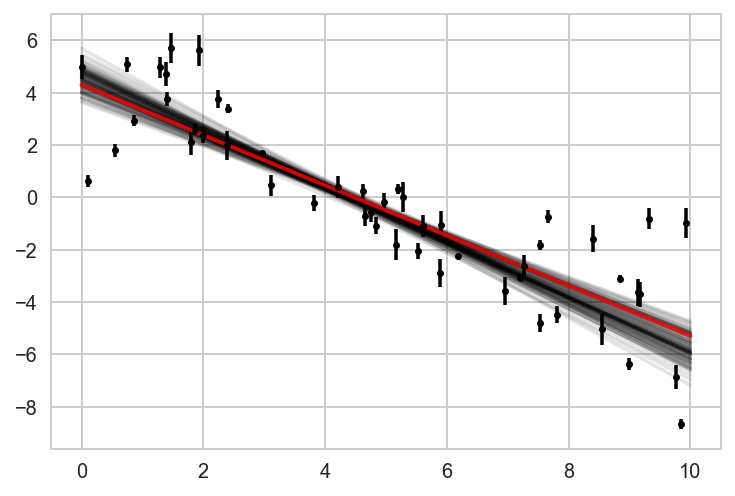

In [61]:
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")

This leaves us with one question: which numbers should go in the abstract? There are a few different options for this but my favorite is to quote the uncertainties based on the 16th, 50th, and 84th percentiles of the samples in the marginalized distributions. To compute these numbers for this example, you would run:

In [62]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [63]:
print(m_mcmc,b_mcmc)

(-1.0388105029012509, 0.08694977757782596, 0.093231400888219573) (4.5449169757463643, 0.43625859193212602, 0.40440767594432359)


this is the values as a range (or, as we like to say, including error) the true values were mtrue=−0.9594,btrue=4.294 so we are not bad!